# Project: System Monitor

## Introduction
So far: Practiced building and instantiating classes.

Next: Build a process manager for the Linux operating system. Linux stores data about the processes running on the system in lots of different files. In this project, we'll read from those files, structure the data, process and format it for output to the terminal. 

This program will require many different classes to handle different types of data and different tasks. Some of these classes are related through composition and inheritance. Some of these classes can be merged by practicing generic programming. 

Use what you've learned to extend the process manager and really make it your own. 

## htop
The system monitor resembles the program htop, which is a standard program for monitoring Linux systems. 

The project uses [ncurses](https://en.wikipedia.org/wiki/Ncurses#:~:text=ncurses%20(new%20curses)%20is%20a,runs%20under%20a%20terminal%20emulator.) for the GUI.

## Starter Code
https://github.com/udacity/CppND-System-Monitor


```bash
git clone https://github.com/udacity/CppND-System-Monitor
```

## Project Structure


### Conceptual Objects
* What are the conceptual objects around which the project is organized? * What is the model that we're using for building this project? 
* How is the code itself organized?
* What files exist and how do they relate to each other?
* What elements in the starter code come pre-populated and which elements remain to be completed
* Look at semantic markers that are left in the code comments, essentially telling me which functions and classes remain to be implemented

* Conceptual Objects
  * The main function instantiates a sytem, which represents the underlying Linux operating system (or the computer itself)
    * The system is composed of classes/objects: There is a container with threads, and a processor.
    * All the different objects (system, threads, processor), they all call these functions that exist in the Linux parser namespace. Those functions go out and parse data from the Linux file system that provide information about the status of all these different objects. 
    * The main function has access to this system object that it creates and within the system object are these other objects that comprise the system object. It can parse the system object to the NCursesDisplay Namespace which takes the system and displays it out to the screen. 
      * You can imagine having many different types of displays where we're using NCurses here, but you could use a more formal windowing system, e.g. standard output. 

* Code Organization
* Starter Code
* Semantic Markers

## Build Tools
See the `Makefile` for more information, but as an example you can run:
```bash
make clean
make build
```

## System Class

## System Data
Linux stores a lot of system data in files within the `/proc` directory. Most of the data that this project requires exists in those files. 
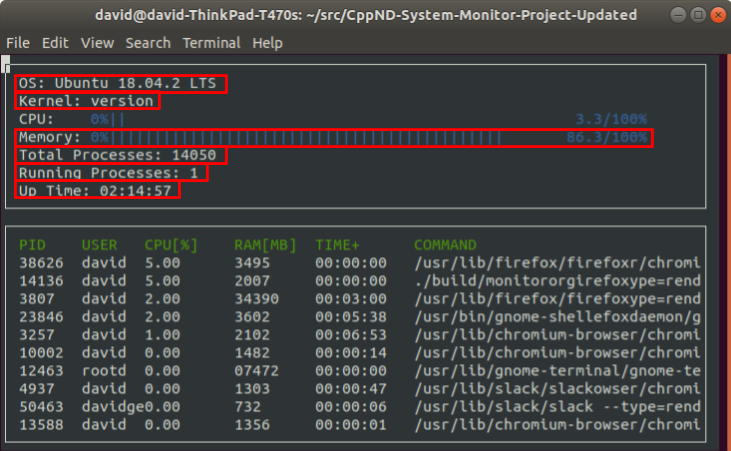

### Operating System
Information about the operating system exists outside of the `/proc` directory, in the `/etc/os-release` file. 

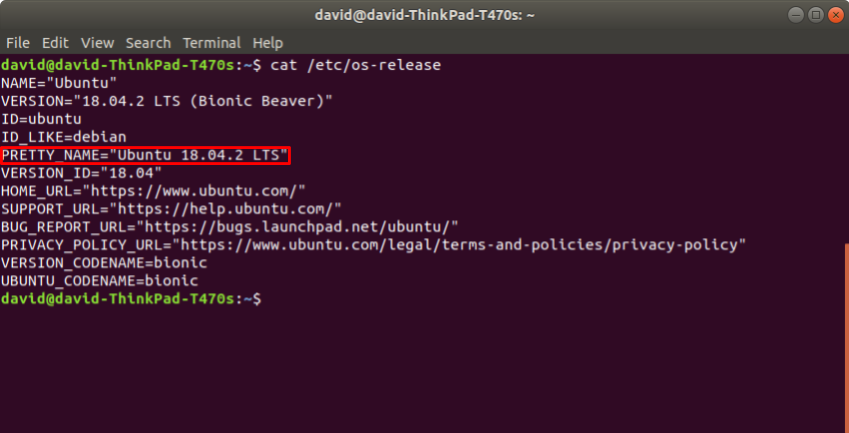

There are several strings from which to choose here, but the most obvious is the value specified by "PRETTY_NAME".

### Kernel
Information about the kernel exists in the `/proc/version` file.

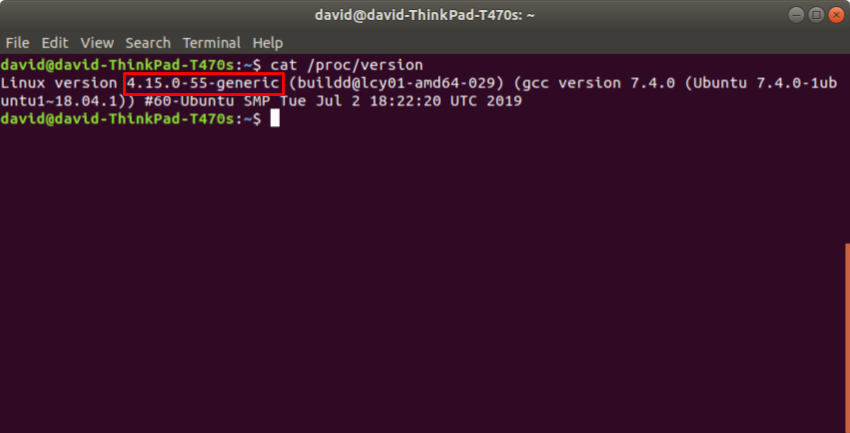

### Memory Utilization
Information about memory utilization exists in the `/proc/meminfo` file.

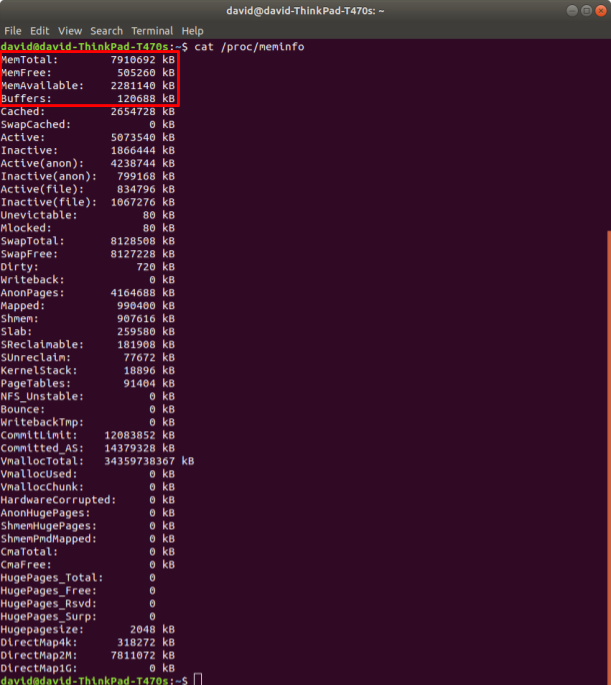

There are a [variety](https://www.thegeekdiary.com/understanding-proc-meminfo-file-analyzing-memory-utilization-in-linux/) of [ways](https://access.redhat.com/solutions/406773) to use this data to calculate memory utilization.

[Hisham H. Muhammad](http://hisham.hm/about), the author of [htop](https://htop.dev/), wrote a [Stack Overflow answer](https://stackoverflow.com/questions/41224738/how-to-calculate-system-memory-usage-from-proc-meminfo-like-htop/41251290#41251290) about how htop calculates memory utilization from the data in `/proc/meminfo`.

Use the formula that makes the most sense to you!

### Total Processes
Information about the total number of processes on the system exists in the `/proc/meminfo` file.

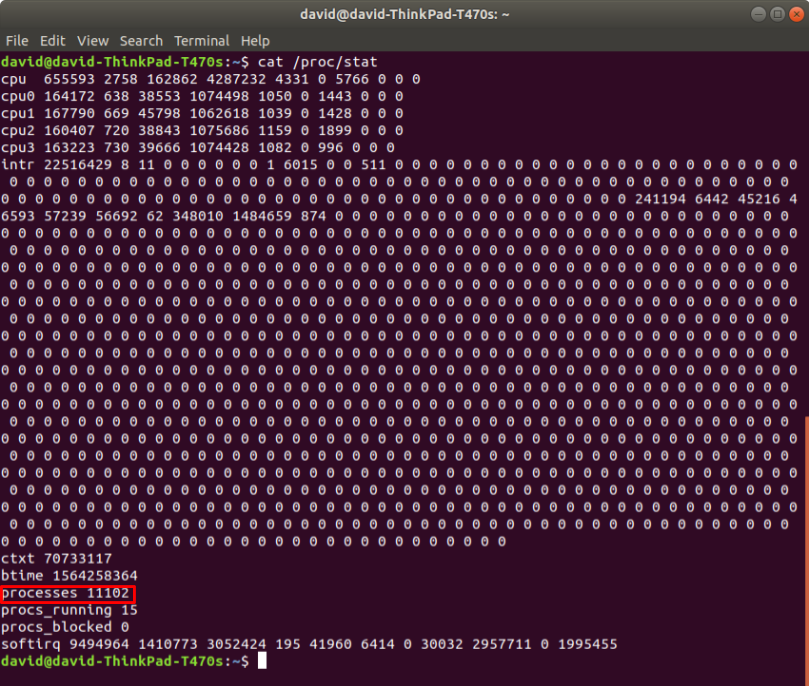

### Running Processes
Information about the number of processes on the system that are currently running exists in the `/proc/meminfo` file.

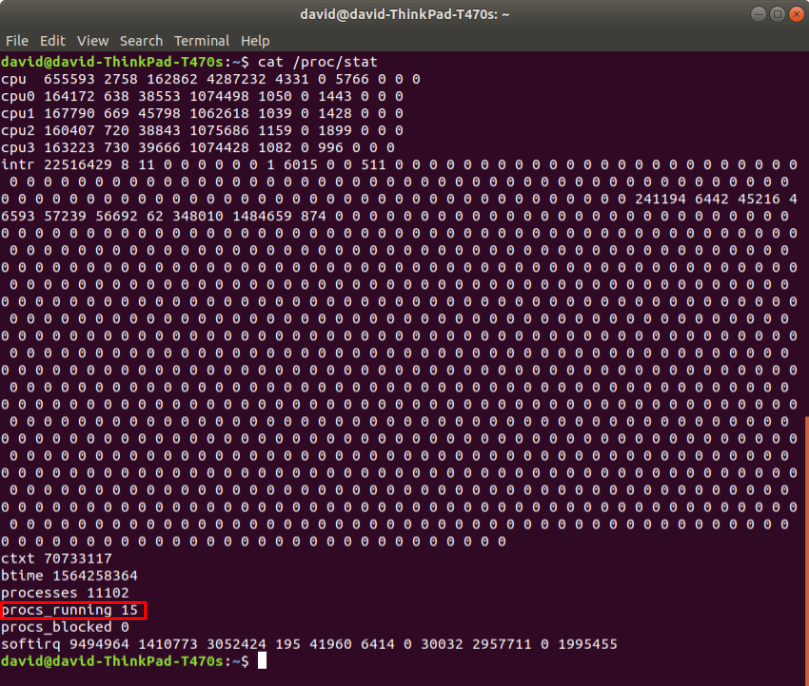

### Up Time
Information about system up time exists in the `/proc/uptime` file.
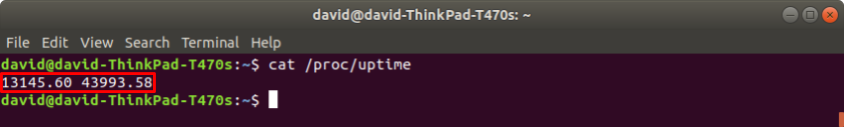

From the [man page for `proc`](https://man7.org/linux/man-pages/man5/proc.5.html):

This file contains two numbers (values in seconds): the uptime of the system (including time spent in suspend) and the amount of time spent in the idle process.

## LinuxParser Namespace
In order to capture data about a Linux system, it turns out that what we need to do is read the file system. Most of the data about the status of a Linux system is stored in the file system often in the proc directory. 

So if we look at what's going on in the proc directory, we can see lots of different sub-directories. There are directories with integral names, which correspond to different processes, and the processes map to process IDs. So the directory name is the process ID of each process. 

Then there are other directories that correspond to more general information about the system. Most of the information that we're looking for about the status of our Linux system is here within the proc directory. 

The linux_parser header and source file capture this information. The interesting part about the linux parser is that it's actually not a class. There's not really any object level data or member level data that needs to be persisted within Linux parser. So instead it's defined as a namespace. There are some constant strings, basically some file system path variables that are constants of the namespace. And then there are lots of different functions that live within the namespace. But, this is not a class for which we instantiate objects, this is just a namespace within which we have represented different functions. 

## String Parsing
A lot of the actual implementation of this project comes down to parsing the linux file system in order to get data about the system to display in the system monitor. 

## Processor Class
The system has a processor, that processes the CPU. The processor is a simple class. All it does is return its utilization. 

How do we figure out what the processors utilization is? 
* We go to the Linux Filesystem. In this case: `/proc/stat`, we see that there's data on the different CPUs on the system. 

Jiffies: Clock ticks, units of time. Add up the amount of time / number of Jiffies that the system is actually working on and then divide that by the total number of Jiffies or the total amount of time that's passed. Of all the time that's passed, how much time has the CPU actually have been active? If we can read in this information and store it as integers, and then do the division (or floating point values so we get a percentage result from the division), then we'll have our number. 

These numbers represent information about the CPU from the beginning of time. If the system has been up for a long time, the CPU utilization might not change very much over the period of time that you're running your system monitor. E.g. if the system has been pretty dormant for a long time, the CPU utilization will come across as low even if the CPU right this instance actually happens to be running at full utilization or red lining, because what we're doing is dividing the all-time number of active time units by the all-time number of total time units, which gives us an all time utilization, but not a good measure of the current utilization right now. 

By doing something more sophisticated, it is possible to capture a more recent measurement of how active the CPU is by looking at how active the CPU was a second ago, and how active the CPU is now, and then try and figure out how heavily utilized has the CPU been in the last second or the last 100 milliseconds. That would give you a more active measurement of how heavily utilized the CPU is right now, as opposed to how heavily utilized the CPU has been over its entire lifetime or the up-time of the system. 

## Processor Data
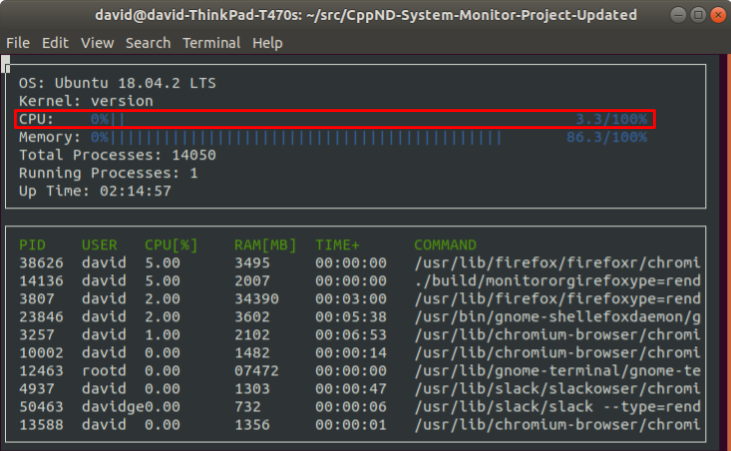

Linux stores processor utilization data within the `/proc/stat` file. 

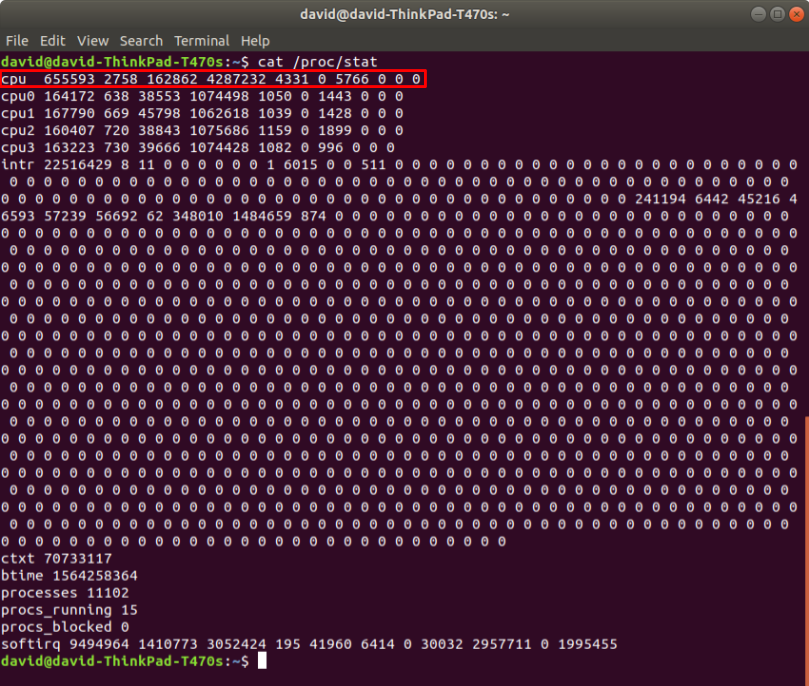

This data is more complex than most of the other data necessary to complete this project.

For example, `/proc/stat` contains aggregate processor information (on the "cpu" line) and individual processor information (on the "cpu0", "cpu1", etc. lines). Indeed, [htop](https://htop.dev/) displays utilization information for each individual processor. 

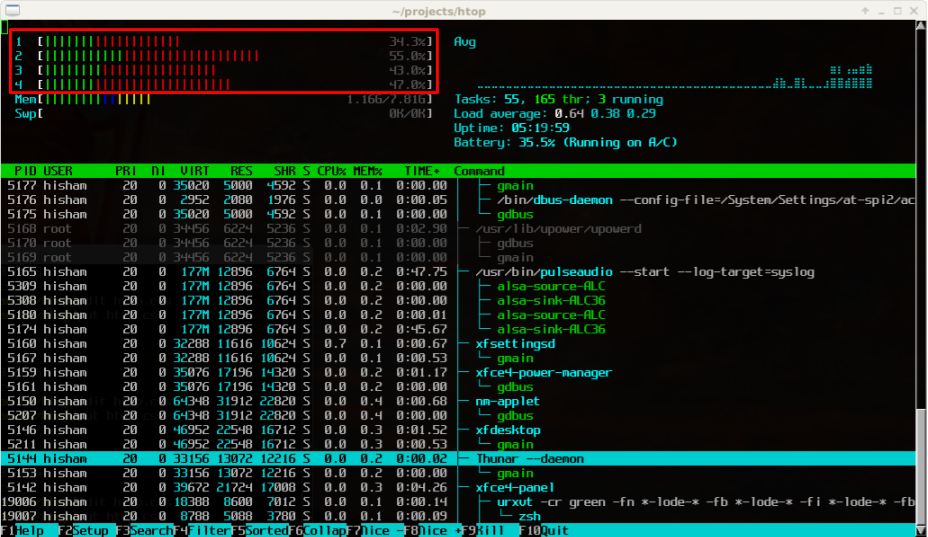

For this project, however, you only need to display aggregate CPU information, which you can find on the "cpu" line of `/proc/stat`.

If you would like to add individual processor information to your system monitor project, go for it. 

### Data
`/proc/stat` contains 10 integer values for each processor. The Linux soruce code [documents each of these numbers](https://github.com/torvalds/linux/blob/master/Documentation/filesystems/proc.rst):

The very first "cpu" line aggregates the numbers in all of the other "cpuN" lines. These numbers identify the amount of time the CPU has spent performing different kinds of work. Time units are in USER_HZ (typically hundredths of a second). The meanings of the columns are as follows, from left to right:

* user: normal processes executing in user mode
* nice: niced processes executing in user mode
* system: processes executing in kernel mode
* idle: twiddling thumbs
* iowait: In a word, iowait stands for waiting for I/O to complete. But there are several problems:
    1. CPU will not wait for I/O to complete, iowait is the time that a task is waiting for I/O to complete. When CPU goes into idle state for outstanding task I/O, another task will be scheduled on this CPU.
    2. In a multi-core CPU, the task waiting for I/O to complete is not running on any CPU, so the iowait of each CPU is difficult to calculate.
    3. The value of iowait field in /proc/stat will decrease in certain conditions. So, the iowait is not reliable by reading from /proc/stat.
* irq: servicing interrupts
* softirq: servicing softirqs
* steal: involuntary wait
* guest: running a normal guest
* guest_nice: running a niced guest

Even once you know what each of these numbers represents, it's still a challenge to determine exactly how to use these figures to calculate processor utilization. This [StackOverflow post](https://stackoverflow.com/questions/23367857/accurate-calculation-of-cpu-usage-given-in-percentage-in-linux) are helpful.

### Measurement Interval
Once you've parsed `/proc/stat` and calculated the processor utilization, you've got what you need for this project. Congratulations!

However, when you run your system monitor, you might notice that the process utilization seems very stable. Too stable.

That's because the processor data in `/proc/stat` is measured since boot. If the system has been up for a long time, a temporary interval of even extreme system utilization is unlikely to change the long-term average statistics very much. This means that the processor could be red-lining _right now_ but the system monitor might still show a relatively underutilized processor, if the processor has spent most of the time since boot in an idle state.

You might want to update the system monitor to report the current utilization of the processor, rather than the long-term average utilization since boot. You would need to measure the difference in system utilization between two points in time relatively close to the present. A formula like:

Δ active time units / Δ total time units

Consider this a bonus challenge that is not required to pass the project.

## Process Class
The system class is composed in part of a container of processes, and each process is in fact a little bit like its own little system.

Each process has a process id, a user that instantiated the process, it has a command that was used to kick off the process, each process has its own CPU utilization, the same way that the system has its own CPU utilization, its own memory utilization, uptime, has a sort function.

Each process should have its own set of information, and particularly around CPU utilizatoin and RAM memory usage, we want to be able to sort the process so that we can list the processes that are either using the most RAM or the most CPU utilization. 

## Process Data
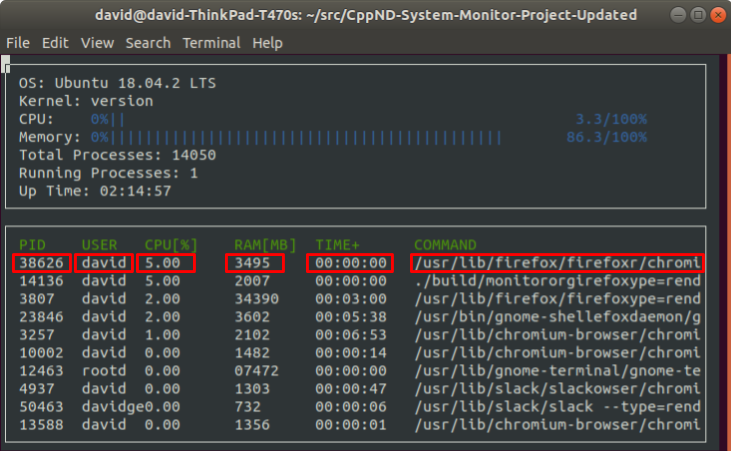

Linux stores data about individual processes in files within subdirectories of the `/proc` directory. Each subdirectory is named for that particular process's [identifier](https://en.wikipedia.org/wiki/Process_identifier) number. The data that this project requires exists in those files.

### PID
The process identifier (PID) is accessible from the `/proc` directory. Typically, all of the subdirectories of `/proc` that have integral names correspond to processes. Each integral name corresponds to a process ID.

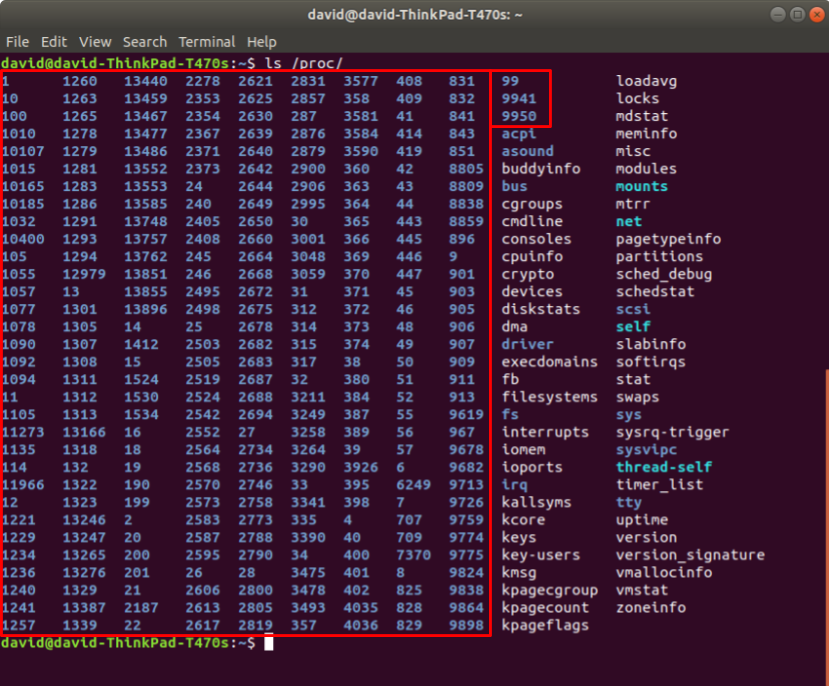

Parsing directory names with C++ is tricky, so we have provided in the project starter code a pre-implemented function to capture the PIDs.

### User
Each process has an associated [user identifier (UID)](https://en.wikipedia.org/wiki/User_identifier), corresponding to the process owner. This means that determining the process owner requires two steps:

1. Find the UID associated with the process
2. Find the user corresponding to that UID
The UID for a process is stored in `/proc/[PID]/status`.

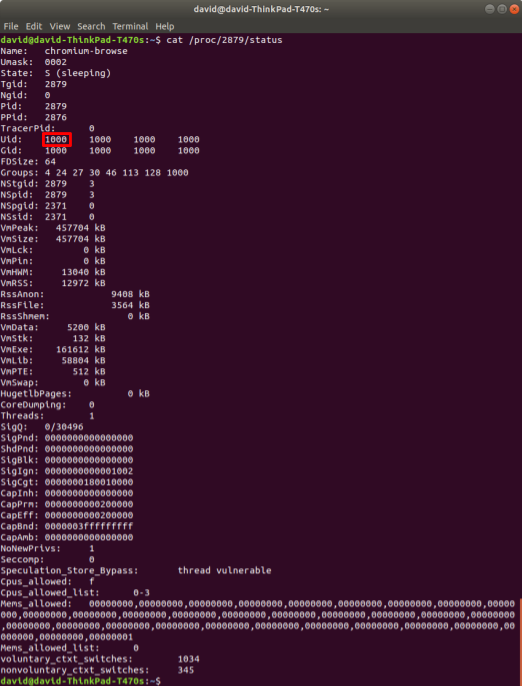

The [man page for `proc`](https://man7.org/linux/man-pages/man5/proc.5.html) contains a "/proc/[pid]/status" section that describes this file.

For the purposes of this project, you simply need to capture the first integer on the "Uid:" line.

### Username
`/etc/passwd` contains the information necessary to match the UID to a username.

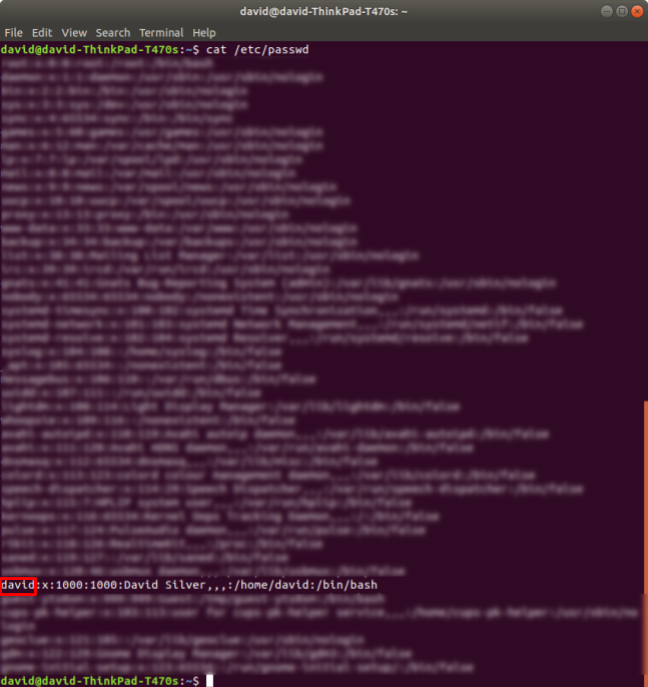

### Processor Utilization
Linux stores the CPU utilization of a process in the `/proc/[PID]/stat` file.

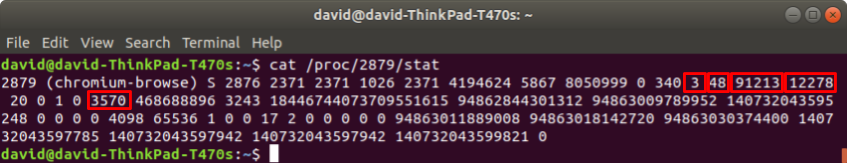

Much like the calculation of aggregate processor utilization, half the battle is extracting the relevant data from the file, and the other half of the battle is figuring out how to use those numbers to calculate processor utilization.

The "/proc/[pid]/stat" section of the [`proc` man page](https://man7.org/linux/man-pages/man5/proc.5.html) describes the meaning of the values in this file. This [StackOverflow answer](https://stackoverflow.com/questions/16726779/how-do-i-get-the-total-cpu-usage-of-an-application-from-proc-pid-stat/16736599#16736599) explains how to use this data to calculate the process's utilization.

As with the calculation of aggregate processor utilization, it is sufficient for this project to calculate the average utilization of each process since the process launched. If you would like to extend your project to calculate a more current measurement of process utilization, we encourage you to do that!

### Memory Utilization
Linux stores memory utilization for the process in `/proc/[pid]/status`.

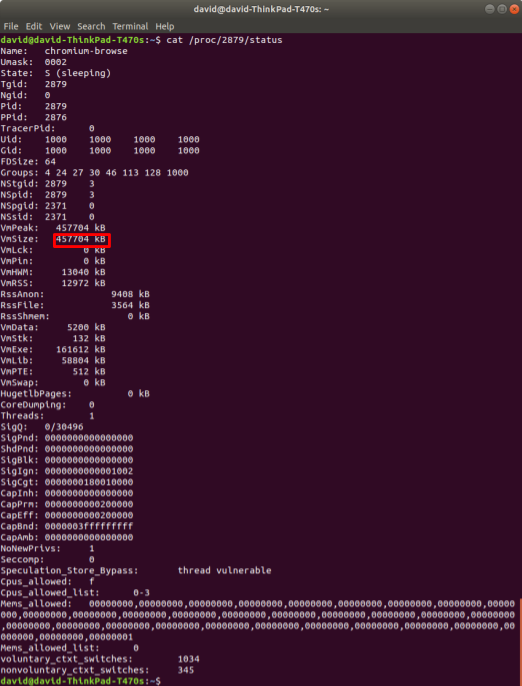

In order to facilitate display, consider [converting the memory utilization into megabytes](https://www.google.com/search?q=convert+from+kb+to+mb&oq=convert+from+kb+to+mb).

### Up Time
Linux stores the process up time in `/proc/[pid]/stat`.

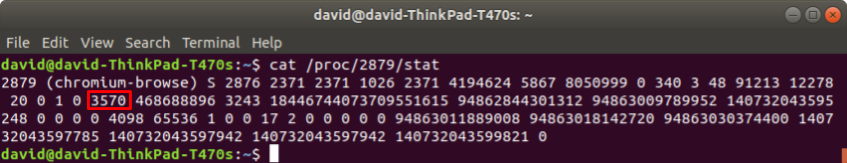

The "/proc/[pid]/stat" section of the [`proc` man page](https://man7.org/linux/man-pages/man5/proc.5.html) describes each of the values in this file.

(22) starttime %llu

The time the process started after system boot. In kernels before Linux 2.6, this value was expressed in jiffies. Since Linux 2.6, the value is expressed in clock ticks (divide by sysconf(_SC_CLK_TCK)).

Note that the "starttime" value in this file is measured in "clock ticks". In order to convert from "clock ticks" to seconds, you must:

* #include <[unistd.h](https://pubs.opengroup.org/onlinepubs/9699919799/basedefs/unistd.h.html)>
* divide the "clock ticks" value by `sysconf(_SC_CLK_TCK)`
Once you have converted the time value to seconds, you can use the `Format::Time()` function from the project starter code to display the seconds in a "HH:MM:SS" format.

### Command
Linux stores the command used to launch the function in the `/proc/[pid]/cmdline` file.

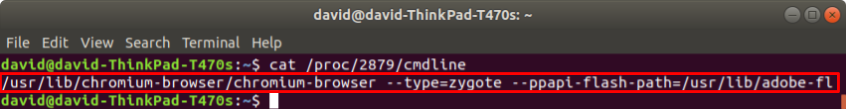

## Project: System Monitor

### ncurses
[ncurses](https://invisible-island.net/ncurses/announce.html) is a library that facilitates text-based graphical output in the terminal. This project relies on ncurses for display output.

Within the Udacity Workspace, `.student_bashrc` automatically installs ncurses every time you launch the Workspace.

If you are not using the Workspace, install ncurses within your own Linux environment: `sudo apt install libncurses5-dev libncursesw5-dev`

### Make
This project uses [Make](https://www.gnu.org/software/make/). The Makefile has four targets:

* `build` compiles the source code and generates an executable
* `format` applies [ClangFormat](https://clang.llvm.org/docs/ClangFormat.html) to style the source code
* `debug` compiles the source code and generates an executable, including debugging symbols
* `clean` deletes the `build/` directory, including all of the build artifacts

### Rubric
Before you start the project, read the [project rubric](https://review.udacity.com/#!/rubrics/2518/view).

### Instructions
1. Clone the project repository: git clone https://github.com/udacity/CppND-System-Monitor-Project-Updated.git
2. Build the project: `make build`
3. Run the resulting executable: `./build/monitor`
4. Follow along with the lesson.
5. Implement the `System`, `Process`, and `Processor` classes, as well as functions within the `LinuxParser` namespace.